# Práctica 6: El juego de la vida

> "Your life is not a simulation; it's the real game. Play wisely.”"
>
> *Richelle E. Goodrich*



El 11 de abril de 2020, una de las grandes leyendas de la humanidad falleció debido al COVID-19. John Conway, de 82 años, era profesor emérito de matemáticas aplicadas y computacionales y  profesor emérito de matemáticas. Su nombre siempre ha estado unido a su invento, el llamado _Juego de la vida de Conway_ para cero jugadores, el cual es uno de los primeros ejemplos de autómatas celulares.  Un autómata celular  es un modelo matemático y computacional para un sistema dinámico que evoluciona en pasos discretos. Es adecuado para modelar sistemas naturales que puedan ser descritos como una colección masiva de objetos simples que interactúen localmente unos con otros. Los autómatas celulares pueden ser usados para modelar numerosos sistemas físicos que se caractericen por un gran número de componentes homogéneos y que interactúen localmente entre sí. De hecho, cualquier sistema real al que se le puedan atribuir los conceptos de "vecindad", "estados de los componentes" y "transición" es posiblemente un candidato para ser modelado por un autómata celular. Algunos ejemplos de áreas en donde se utilizan los autómatas celulares son:

* Modelado del flujo de tráfico y de peatones.

* Modelado de fluidos (gases o líquidos).

* Modelado de la evolución de células o virus como el VIH.

* Modelado de procesos de telecomunicación.

En esta práctica hablaremos del famosísimo juego de la vida de Conway. Una de las cosas que mucha gente hace cuando tiene un cuaderno con cuadrícula es colorear ciertos cuadritos. No estoy seguro de por que se hace esto, pero es muy común. Incluso hay toda una forma de arte digital llamada Pixel Art donde las imágenes son creadas a nivel de pixel


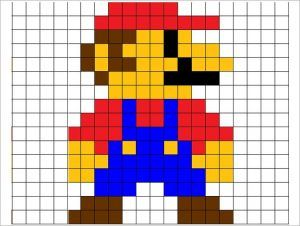 

El juego de la vida es un juego visual de matemáticas basado en una cuadrícula donde pintaremos píxeles monocromáticos; dado lo anterior, realmente me llamó la atención. Entonces lo primero que haremos es hacer nuestro tablero de juego. Pensaremos nuestro tablero como una matriz (o arreglo de dos dimensiones) y para visualizarlo ocuparemos el comando *matrix_plot*. Primero definimos el tamaño en $x$ y el tamaño en $y$ de nuestra cuadrícula. Después generamos una matriz que contenga ceros en todas sus entradas y luego la mostramos.

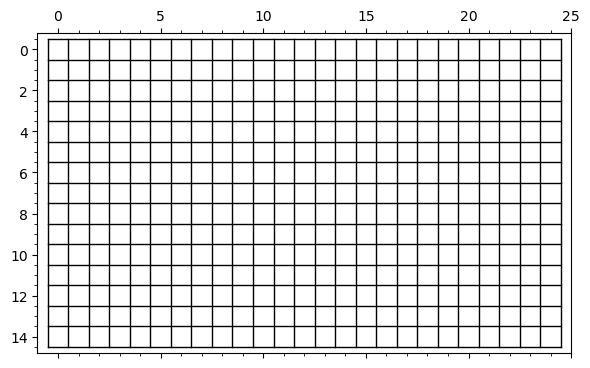

In [5]:
tamaniox=15
tamanioy=25
M=matrix(ZZ,tamaniox,tamanioy)
matrix_plot(M,subdivisions=True,subdivision_boundaries=[srange(tamaniox+1), srange(tamanioy+1)],subdivision_style=[dict(color ='black'), dict (color = 'black')])

Con esto ya tendríamos nuestro tablero de juego lleno de cuadritos. Ahora cada cuadrito puede estar prendido o apagado. Ahorita todos los cuadritos estan apagados (esto quiere decir en el código que la entrada de la matriz es cero). Para prenderlo podríamos modificar el cuadrito para que sea un uno.



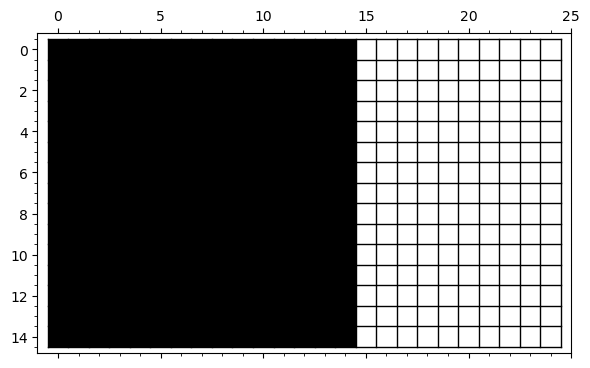

In [6]:

for i in range(15):
    M[:,i]=1
matrix_plot(M,subdivisions=True,subdivision_boundaries=[srange(tamaniox+1), srange(tamanioy+1)],subdivision_style=[dict(color ='black'), dict (color = 'black')])

Podríamos prender cualquier cantidad de cuadritos.



Antes de que comience el juego deberemos configurar que cuadritos queremos prendidos. A esta configuración se le llama *configuración inicial*. El juego de la vida es un juego de cero jugadores porque tu participación como *"jugador"* acaba antes de que comience el juego. Una vez que has puesto tu configuración inicial termina tu participación, todo lo que se puede hacer es ver como avanza el juego.

Al igual que nuestro propio universo, que tiene solo unas cuantas leyes fundamentales de la física de las que surge todo lo que podemos ver, tocar, oír, saborear y oler, el juego de la vida simula su propio universo y para ello tiene algunas reglas básicas:

* Un cuadrado vivo con cero o un vecinos vivos muere por __soledad__

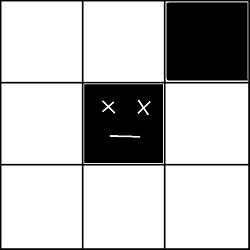

* Un cuadrado vivo con cuatro o más vecinos vivos muere por __sobrepoblación__

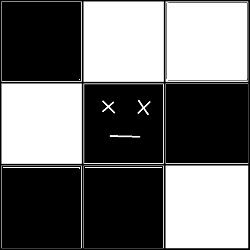

* Un cuadrado vivo con 2 o 3 vecinos vivos __sobrevive__

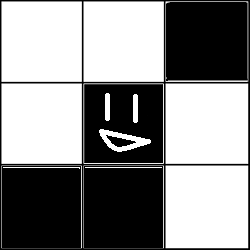

* Un cuadrado muerto con exactamente 3 vecinos vivos se vuelve vivo por __reproducción__

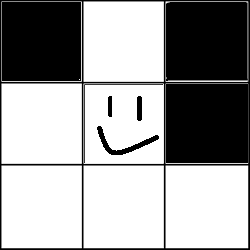

Después de comenzar el juego, el tablero se actualiza repetidamente según estas reglas. Los cuadritos se vuelven vivos o muertos en cada paso usando estas reglas. En ocasiones el juego de la vida considera un tablero toroidal esto lo hacemos identificando el borde derecho del tablero con el izquierdo y el borde superior con el inferior.

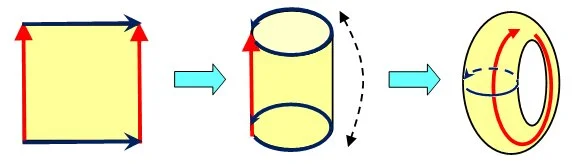

Si bien esta idea te podría parecer un poco rara al principio es bastante común. Por ejemplo en el juego de Pacman, puedes usar un camino del lado derecho para salir del lado izquierdo. Si algo similar sucediera con el lado de superior y el inferior entonces pacman seria un juego toroidal

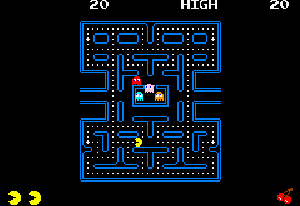

Programaremos esta versión toroidal en esta práctica. Para ello primero debemos de hacer una función que reciba el tablero en su estado actual y un cierto cuadrito y cuente cuantos vecinos vivos tiene ese cuadradito.


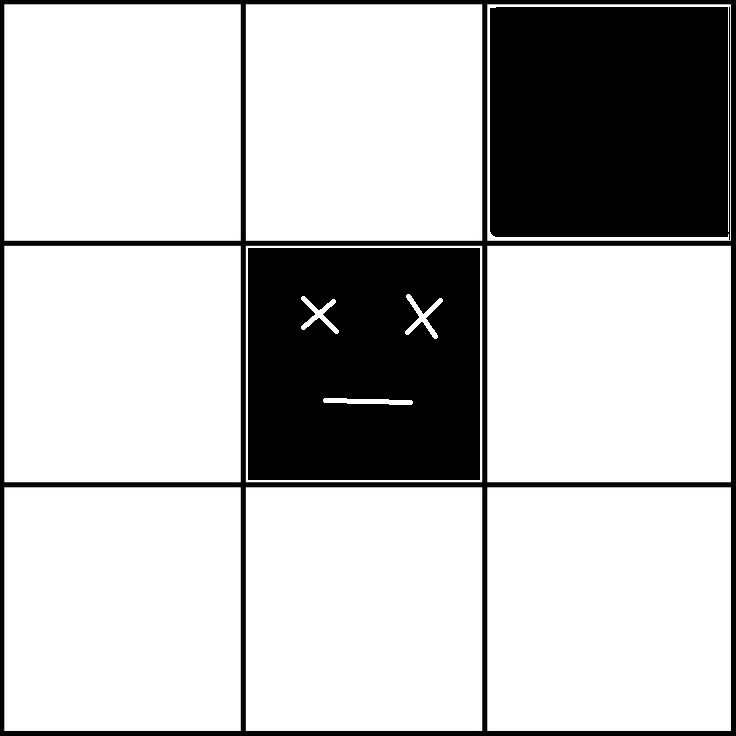

In [7]:

def ContarVecinosVivos (M,i,j): #Recibe el tablero M y las coordenadas i y j, lo que quiere decir que contaremos los vecinos del cuadrito (i,j)
    contador=0 #Esta variable llevara la cuenta de cuantos vecinos vivos tiene
    n=M.nrows() #El numero de renglones en el tablero
    m=M.ncols() #El numero de columnas en el tablero
    if M[(i-1)%n][(j-1)%m]==1: #Verifica el vecino superior izquierdo
        contador=contador+1
    if M[(i-1)%n][(j)%m]==1: #Verifica el vecino superior
        contador=contador+1
    if M[(i-1)%n][(j+1)%m]==1: #Verifica el vecino superior derecho
        contador=contador+1
    if M[(i)%n][(j-1)%m]==1: #Verifica el vecino izquierdo
        contador=contador+1
    if M[(i)%n][(j+1)%m]==1:#Verifica el vecino derecho
        contador=contador+1
    if M[(i+1)%n][(j-1)%m]==1:#Verifica el vecino inferior izquierdo
        contador=contador+1
    if M[(i+1)%n][(j)%m]==1: #Verifica el vecino inferior
        contador=contador+1
    if M[(i+1)%n][(j+1)%m]==1: #Verifica el vecino inferior derecho
        contador=contador+1
    return contador
ContarVecinosVivos (M,4,12)

8

Ahora que tenemos la función que cuenta a los vecinos definiremos una función que haga que el sistema avance un paso. Es decir, esta función aplicara las reglas del juego a cada uno de los cuadritos.



In [8]:
def Avanza(M): #Esta funcion recibe el tablero actual y procedera a aaplicar las reglas a cada cuadrito
    N=copy(M) #Primero generamos un nuervo tablero al que haremos los cambios 
    for i in srange(N.nrows()):
        for j in srange(N.ncols()): #Estos for anidados hacenn que recorramos todos los cuadritos
            VecinosVivos=ContarVecinosVivos(M,i,j) #Nos paramos en un cuadrito y contamos sus vecinos vivos
            if M[i][j]==1: #Si el cuadrito en el que nos paramos esta vivo 
                if VecinosVivos<2 or VecinosVivos>3: #Pero hay soledad o sobrepoblacion 
                    N[i,j]=0 #Se muere 
                    #Observa que si no hay soledad o sobrepoblacion entonces no cambiara y permanecera vivo 
            if M[i][j]==0: #Si el cuadrito en el nos paramos esta muerto 
                if VecinosVivos==3: #Pero hay reproduccion 
                    N[i,j]=1 #Se vuelve vivo
    return N

Veamos un caso particular de nuestra implementación

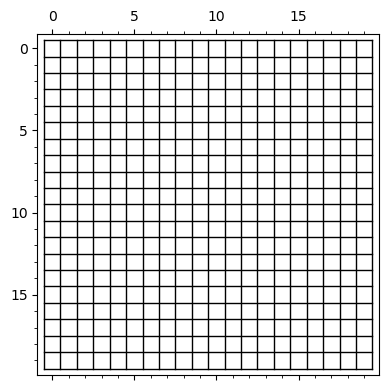

In [9]:
tamaniox=20
tamanioy=20
M=matrix(ZZ,tamaniox,tamanioy)
matrix_plot(M,subdivisions=True,subdivision_boundaries=[srange(tamaniox+1), srange(tamanioy+1)],subdivision_style=[dict(color ='black'), dict (color = 'black')])




Ponemos una configuración inicial:



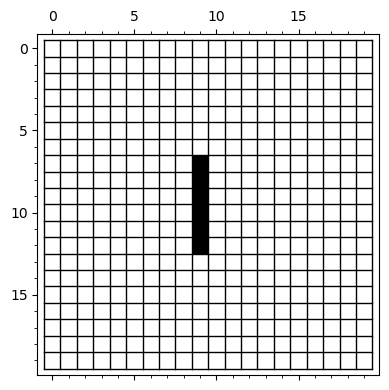

In [10]:
for i in srange(7,13):
    M[i,9]=1
matrix_plot(M,subdivisions=True,subdivision_boundaries=[srange(tamaniox+1), srange(tamanioy+1)],subdivision_style=[dict(color ='black'), dict (color = 'black')])

y avanzamos un paso:



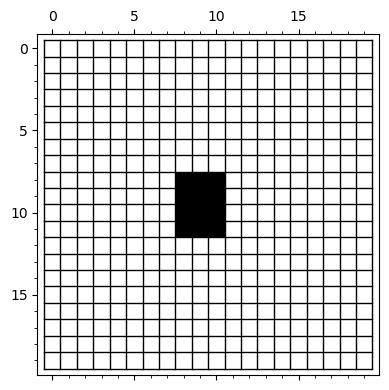

In [11]:
M=Avanza(M)
matrix_plot(M,subdivisions=True,subdivision_boundaries=[srange(tamaniox+1), srange(tamanioy+1)],subdivision_style=[dict(color ='black'), dict (color = 'black')])

Muy bien!! Ahora la idea es repetir esto de avanzar un paso para ver que sucede:



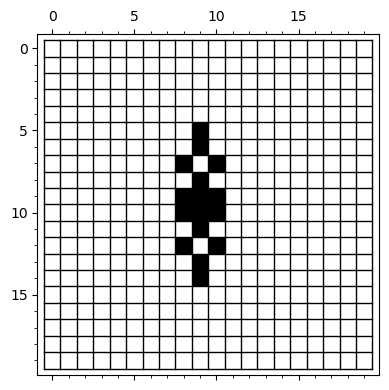

In [12]:

for i in range (6):
    M=Avanza(M)
matrix_plot(M,subdivisions=True,subdivision_boundaries=[srange(tamaniox+1), srange(tamanioy+1)],subdivision_style=[dict(color ='black'), dict (color = 'black')])

Y esta configuración inicial desapareció. Por supuesto sería horrible tener que estar corriendo el código paso a paso, pero afortunadamente podemos hacer un gif que nos permita ver la evolución del juego.



In [13]:
Imagenes=[]
for i in range (15):
    Imagenes.append(matrix_plot(M,subdivisions=True,subdivision_boundaries=[srange(tamaniox+1), srange(tamanioy+1)],subdivision_style=[dict(color  ='black'), dict (color = 'black')]))
    M=Avanza(M)


De esta manera nuestra lista *Imagenes* ya contiene todas las imágenes del juego, y ahora hacer el gif es muy sencillo usando la funcion *animate*

__¡Cuidado!__ esta función tardará más entre más imágenes tenga la lista.

In [14]:
animacion=animate(Imagenes)
animacion.show()

Puedes dar clic derecho en la imagen y descargarla como gif. El Juego de la Vida podría parecerte intrascendente. Dibujas una imagen monocromática en píxeles grandes, lo echas a andar y todo explota hasta que vuelve a tener una pantalla en blanco. No hay una meta o estrategia establecida, y no es posible la interacción. Sin embargo, pueden surgir cosas super interesantes. Algunos patrones se repiten:



In [15]:
tamaniox=20
tamanioy=20
M=matrix(ZZ,tamaniox,tamanioy)
for i in srange(7,12):
    M[i,9]=1

for i in range (15):
    Imagenes.append(matrix_plot(M,subdivisions=True,subdivision_boundaries=[srange(tamaniox+1), srange(tamanioy+1)],subdivision_style=[dict(color  ='black'), dict (color = 'black')]))
    M=Avanza(M)
animacion=animate(Imagenes)
animacion.show()

Mientras que otros patrones al parecer solo van moviéndose sin desaparecer como este que se conoce como *planeador*



In [16]:
tamaniox=20
tamanioy=20
M=matrix(ZZ,tamaniox,tamanioy)

M[3,2]=1
M[4,3]=1
M[5,1]=1
M[5,2]=1
M[5,3]=1
Imagenes=[]
for i in range (15):
    Imagenes.append(matrix_plot(M,subdivisions=True,subdivision_boundaries=[srange(tamaniox+1), srange(tamanioy+1)],subdivision_style=[dict(color  ='black'), dict (color = 'black')]))
    M=Avanza(M)
animacion=animate(Imagenes)
animacion.show()

Hay varios de estos patrones, que presentan propiedades muy complejase interesantes, y todos ellos surgen de las reglas simples del juego, lo mismo que sucede en nuestro propio universo. Hay muchos que se han descubierto y diseñado. Como el siguiente. Se llama *cañón de planeadores*. Eso es porque esta estructura, una vez arranca, escupe varios planeadores hasta destruirse.

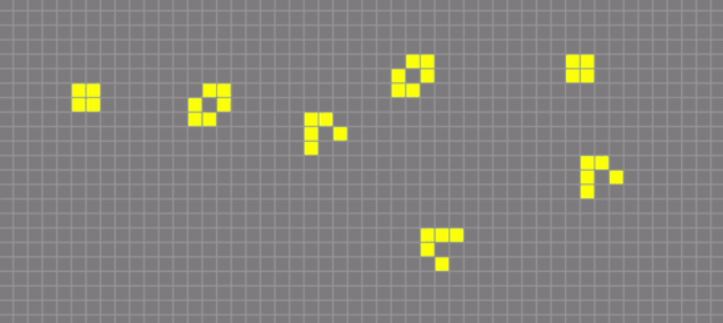

La razón por la que el Juego de la vida es tan importante, es porque es posible ver cómo estructuras complejas y autónomas pueden emerger entre el caos de un universo muy simple. Es posible simplemente ver cómo las estructuras pueden unirse y formar estructuras cada vez más grandes y complejas que no son más que conjuntos de estructuras más simples.

Todo esto debería ser fascinante de inmediato para cualquier persona interesada en las matemáticas, la computación, la biología y hasta la filosofía.

Pero hay aun más... Sabemos que las computadoras  funcionan con un sistema binario de unos y ceros. Esto se debe a que a principios del siglo pasado inventamos cosas que llamamos "compuertas lógicas". Son dispositivos que toman una señal eléctrica, representada por un voltaje "alto" o "bajo" (1 o 0) y producen una salida eléctrica. Estas compuertas lógicas corresponden a los operadores lógicos __y__, __o__ y __no__ y resulta que existen configuraciones iniciales que permiten representar a esas compuertas en el juego de la vida. Esto implica que cualquier circuito lógico lo podemos implementar en el juego de la vida. Una de las características del Juego de la vida es que es lo que llamamos __Turing-completo__. Este término, que lleva el nombre de Alan Turing, se ocupa para cualquier sistema que pueda implementar una máquina de Turing teórica: un modelo para una computadora de propósito general, un sistema que es capaz de reconocer o decidir otros conjuntos de reglas de manipulación de datos. Básicamente, lo que hoy consideramos una computadora. Esto quiere decir, a grandes rasgos, que cualquier cosa que pueda hacer una computadora, también la puede hacer el juego de la vida. Todos debemos estar agradecidos con John Conway por regalarnos esta poderosa herramienta, que nos permite ver nuestro propio universo desde nuevas perspectivas.



In [17]:
tamañox=25
tamañoy=25
Pasos=45
M=matrix(ZZ,tamañox,tamañoy)
M[21,6]=1; M[20,6]=1; M[20,8]=1; M[21,8]=1; M[19,7]=1; M[18,7]=1; M[17,7]=1; M[16,7]=1; M[17,6]=1; M[17,8]=1; M[18,5]=1; M[17,4]=1; M[18,9]=1;M[19,10]=1; M[15,6]=1; M[14,6]=1; M[13,6]=1; M[13,7]=1; M[15,8]=1; M[14,8]=1; M[13,8]=1
Imagenes=[matrix_plot(M, subdivisions=True, subdivision_boundaries=[srange(tamañox+1),srange(tamañoy+1)],  subdivision_style=[dict(color='lightgray'), dict(color='lightgray')])]
Imagenes.append(matrix_plot(M, subdivisions=True, subdivision_boundaries=[srange(tamañox+1),srange(tamañoy+1)],  subdivision_style=[dict(color='lightgray'), dict(color='lightgray')]))

Imagenes.append(matrix_plot(M, subdivisions=True, subdivision_boundaries=[srange(tamañox+1),srange(tamañoy+1)],  subdivision_style=[dict(color='lightgray'), dict(color='lightgray')]))

Imagenes.append(matrix_plot(M, subdivisions=True, subdivision_boundaries=[srange(tamañox+1),srange(tamañoy+1)],  subdivision_style=[dict(color='lightgray'), dict(color='lightgray')]))

Imagenes.append(matrix_plot(M, subdivisions=True, subdivision_boundaries=[srange(tamañox+1),srange(tamañoy+1)],  subdivision_style=[dict(color='lightgray'), dict(color='lightgray')]))

Imagenes.append(matrix_plot(M, subdivisions=True, subdivision_boundaries=[srange(tamañox+1),srange(tamañoy+1)],  subdivision_style=[dict(color='lightgray'), dict(color='lightgray')]))

Imagenes.append(matrix_plot(M, subdivisions=True, subdivision_boundaries=[srange(tamañox+1),srange(tamañoy+1)],  subdivision_style=[dict(color='lightgray'), dict(color='lightgray')]))

Imagenes.append(matrix_plot(M, subdivisions=True, subdivision_boundaries=[srange(tamañox+1),srange(tamañoy+1)],  subdivision_style=[dict(color='lightgray'), dict(color='lightgray')]))

Imagenes.append(matrix_plot(M, subdivisions=True, subdivision_boundaries=[srange(tamañox+1),srange(tamañoy+1)],  subdivision_style=[dict(color='lightgray'), dict(color='lightgray')]))
for i in srange(Pasos):
    M=Avanza(M)
    Imagenes.append(matrix_plot(M, subdivisions=True, subdivision_boundaries=[srange(tamañox+1),srange(tamañoy+1)],  subdivision_style=[dict(color='lightgray'), dict(color='lightgray')]))
animacion=animate(Imagenes)
animacion.show()

# Entregable

Juega con distintas configuraciones iniciales y encuentra una cuya evolución sea interesante. Después sube el gif al foro en UbiCua, donde expliques que es lo que sucede y por que te pareció interesante



In [18]:
tamañox=25
tamañoy=25
Pasos=45
M=matrix(ZZ,tamañox,tamañoy)


f=0
for i in srange(24):
    M[i,f]=1
    f=f+1

f=0
for j in srange(24):
    M[24-i,24-f]=1
    f=f+1


Imagenes=[matrix_plot(M, subdivisions=True, subdivision_boundaries=[srange(tamañox+1),srange(tamañoy+1)],  subdivision_style=[dict(color='lightgray'), dict(color='lightgray')])]


Imagenes.append(matrix_plot(M, subdivisions=True, subdivision_boundaries=[srange(tamañox+1),srange(tamañoy+1)],  subdivision_style=[dict(color='lightgray'), dict(color='lightgray')]))

Imagenes.append(matrix_plot(M, subdivisions=True, subdivision_boundaries=[srange(tamañox+1),srange(tamañoy+1)],  subdivision_style=[dict(color='lightgray'), dict(color='lightgray')]))

Imagenes.append(matrix_plot(M, subdivisions=True, subdivision_boundaries=[srange(tamañox+1),srange(tamañoy+1)],  subdivision_style=[dict(color='lightgray'), dict(color='lightgray')]))

Imagenes.append(matrix_plot(M, subdivisions=True, subdivision_boundaries=[srange(tamañox+1),srange(tamañoy+1)],  subdivision_style=[dict(color='lightgray'), dict(color='lightgray')]))

Imagenes.append(matrix_plot(M, subdivisions=True, subdivision_boundaries=[srange(tamañox+1),srange(tamañoy+1)],  subdivision_style=[dict(color='lightgray'), dict(color='lightgray')]))

Imagenes.append(matrix_plot(M, subdivisions=True, subdivision_boundaries=[srange(tamañox+1),srange(tamañoy+1)],  subdivision_style=[dict(color='lightgray'), dict(color='lightgray')]))

Imagenes.append(matrix_plot(M, subdivisions=True, subdivision_boundaries=[srange(tamañox+1),srange(tamañoy+1)],  subdivision_style=[dict(color='lightgray'), dict(color='lightgray')]))

Imagenes.append(matrix_plot(M, subdivisions=True, subdivision_boundaries=[srange(tamañox+1),srange(tamañoy+1)],  subdivision_style=[dict(color='lightgray'), dict(color='lightgray')]))
for i in srange(Pasos):
    M=Avanza(M)
    Imagenes.append(matrix_plot(M, subdivisions=True, subdivision_boundaries=[srange(tamañox+1),srange(tamañoy+1)],  subdivision_style=[dict(color='lightgray'), dict(color='lightgray')]))
animacion=animate(Imagenes)
animacion.show()